## Análisis exploratorio de datos de un Dataset de Spotify

__[Link al DataSet](https://www.kaggle.com/datasets/geomack/spotifyclassification)__

__[Documentación de la API de Spotify](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features)__

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
sns.set_style("darkgrid")

## Cargando el DataSet

In [3]:
df = pd.read_csv("data.csv")
df.drop("Unnamed: 0", axis=1, inplace=True) #Eliminamos la columna Unnamed
df

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


## Limpipando los datos

In [4]:
df.isna().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
 14  song_title        2017 non-null   object 
 15  artist            2017 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory

In [6]:
df.shape #Vemos cuantas filas y columnas tiene el Dataset

(2017, 16)

In [7]:
df.columns #Vemos las etiquetas de las columnas

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [8]:
df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


## Análisis de datos

### Los 5 artistas más populares

In [9]:
top_cinco_artistas = df.groupby("artist").count().sort_values(by='song_title', ascending=False)["song_title"][:5]
top_cinco_artistas

artist
Drake              16
Rick Ross          13
Disclosure         12
Backstreet Boys    10
WALK THE MOON      10
Name: song_title, dtype: int64

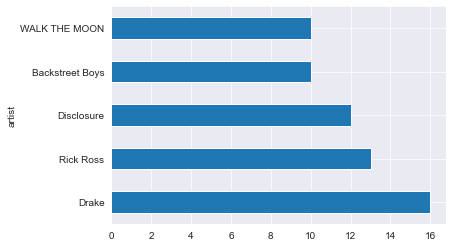

In [10]:
top_cinco_artistas.plot.barh()
plt.show()

### Las 5 canciones más ruidosas

In [11]:
top_cinco_canciones_ruidosas = df[["loudness", "song_title"]].sort_values(by='loudness', ascending=True)[:5]
top_cinco_canciones_ruidosas

,loudness,song_title
1594,-33.097,"Lyric Pieces, Book I Op. 12: I. Arietta"
1596,-31.367,"8 Fantasiestücke, Op.12 : 1. Des Abends"
1598,-31.082,"Piano Quartet in E flat, Op.47: 3. Andante can..."
1531,-30.447,"I Was So Young, and You Were So Beautiful"
1549,-29.460,Eleanor


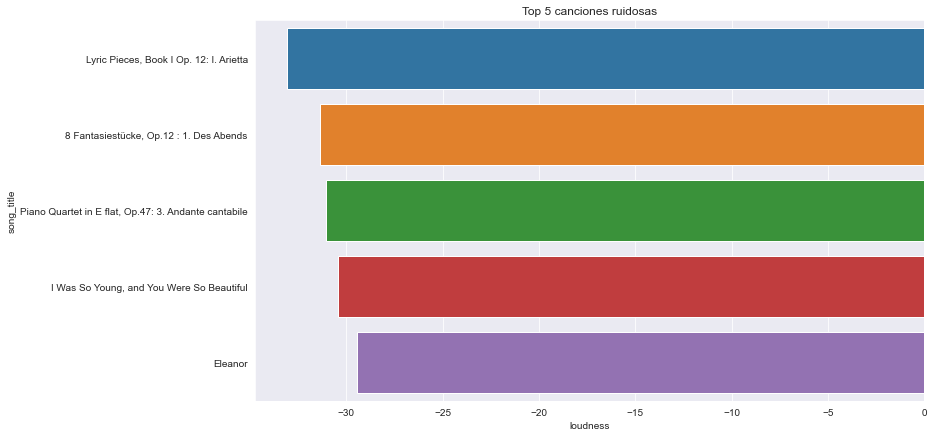

In [12]:
plt.figure(figsize=(12,7))
sns.barplot(x='loudness', y="song_title", data=top_cinco_canciones_ruidosas)
plt.title("Top 5 canciones ruidosas")
plt.show()

### Artistas con mayor 'bailabilidad'

In [13]:
top_cinco_artistas_canciones_bailables = df[['danceability', 'song_title', 'artist']].sort_values(by='danceability', ascending=False)[:5]
top_cinco_artistas_canciones_bailables

,danceability,song_title,artist
1433,0.984,Flashwind - Radio Edit,Ben Remember
1901,0.967,SexyBack,Justin Timberlake
604,0.962,Check Me Out Like,Blaqstarr
32,0.959,Best Friend,Young Thug
1957,0.959,Ice Ice Baby,Vanilla Ice


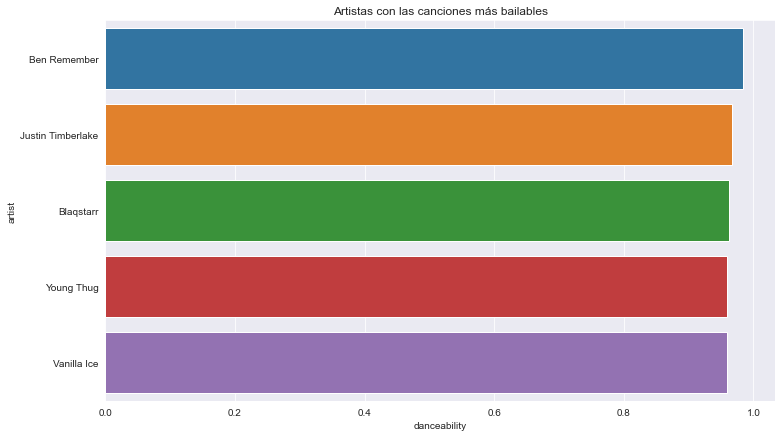

In [14]:
plt.figure(figsize=(12,7))
sns.barplot(x='danceability', y='artist', data=top_cinco_artistas_canciones_bailables)
plt.title('Artistas con las canciones más bailables')
plt.show()

### Top 10 canciones instrumentales

In [15]:
top_diez_canciones_instrumentales = df[['instrumentalness', 'song_title', 'artist']].sort_values(by='instrumentalness', ascending=False)[:10]
top_diez_canciones_instrumentales

,instrumentalness,song_title,artist
1313,0.976,Senseless Order,Signs of the Swarm
271,0.968,So Destroyed (channeling Rage Peace),Prince Rama
1575,0.964,A Hundred Dreams from Now,Ray Bryant
1619,0.958,Raven,John Dahlbäck
725,0.957,Strandbar (disko),Todd Terje
1546,0.956,Almas vaggvisa,Jan Lundgren Trio
1322,0.955,Pitchblack,Walking Dead On Broadway
1349,0.954,Prismatic Abyss,Aversions Crown
1661,0.954,Yebisah,Mark Knight
121,0.952,Chasing Heaven,Bassnectar


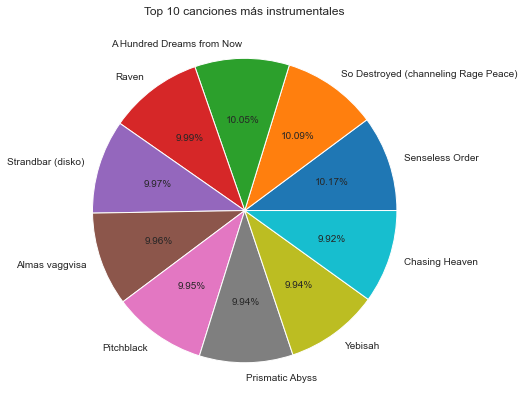

In [16]:
plt.figure(figsize=(12,7))
plt.pie(x='instrumentalness', data=top_diez_canciones_instrumentales, autopct='%1.2f%%', labels=top_diez_canciones_instrumentales.song_title)
plt.title('Top 10 canciones más instrumentales')
plt.show()

### Otras características a tener en cuenta

In [17]:
columnas_de_interes = ['tempo', 'loudness', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']

C:\Users\usuario\AppData\Local\Temp\ipykernel_8664\2722323241.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pos_data, bins=30, label='Positivo', color='green')
C:\Users\usuario\AppData\Local\Temp\ipykernel_8664\2722323241.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(neg_data, bins=3

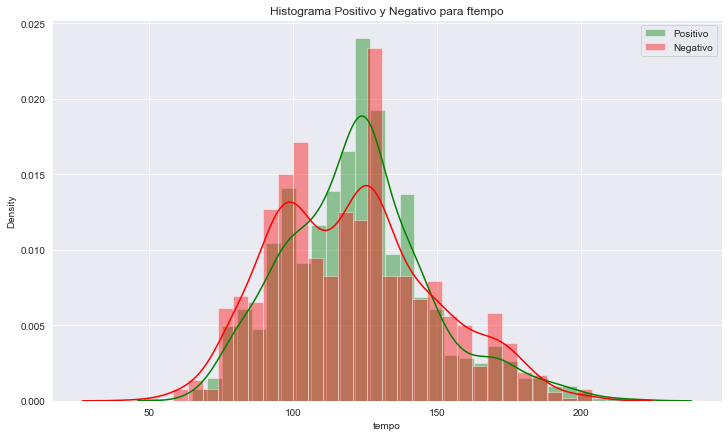

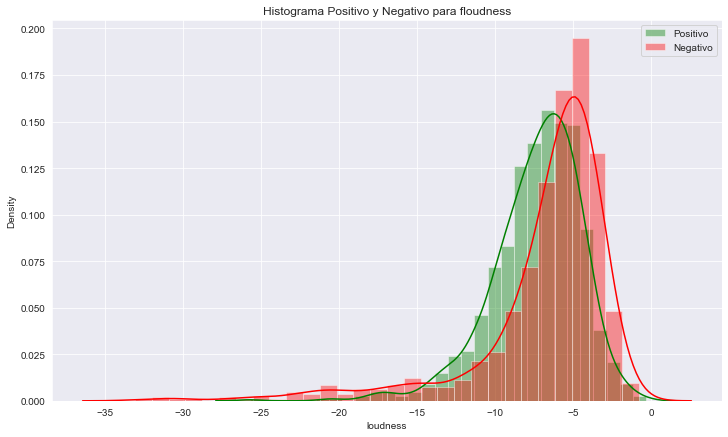

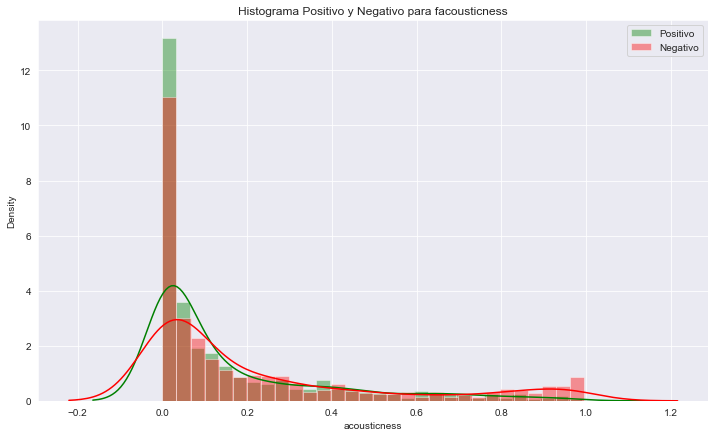

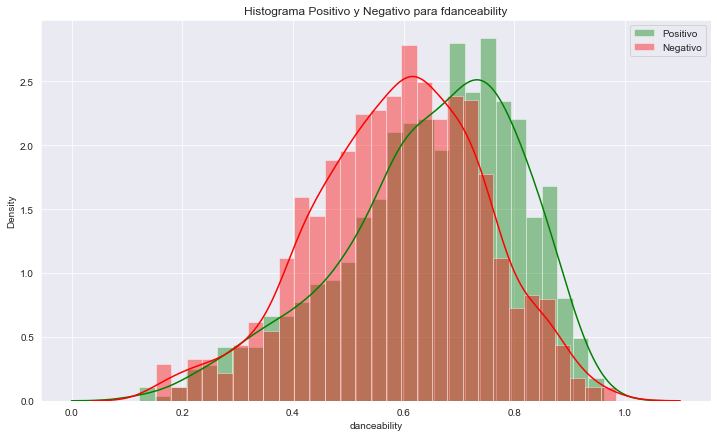

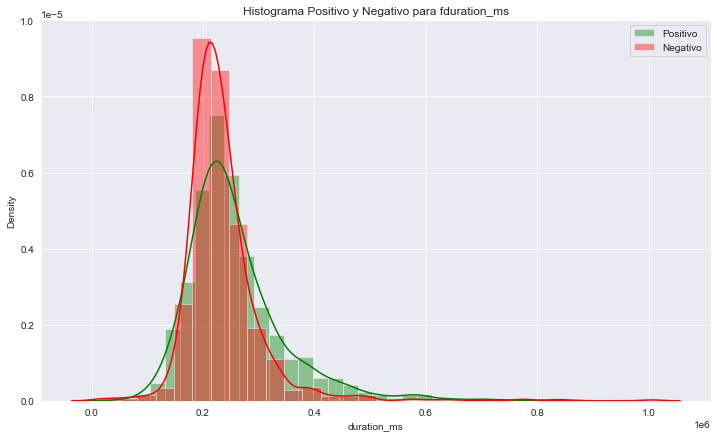

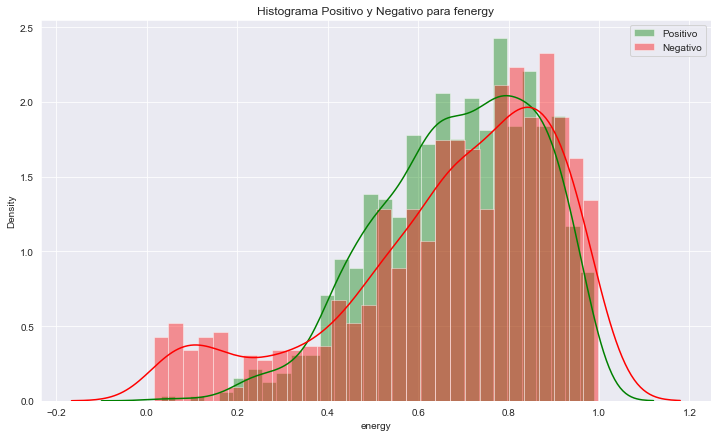

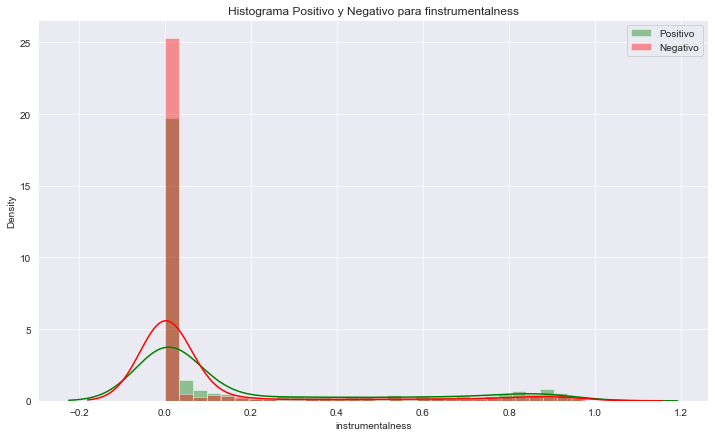

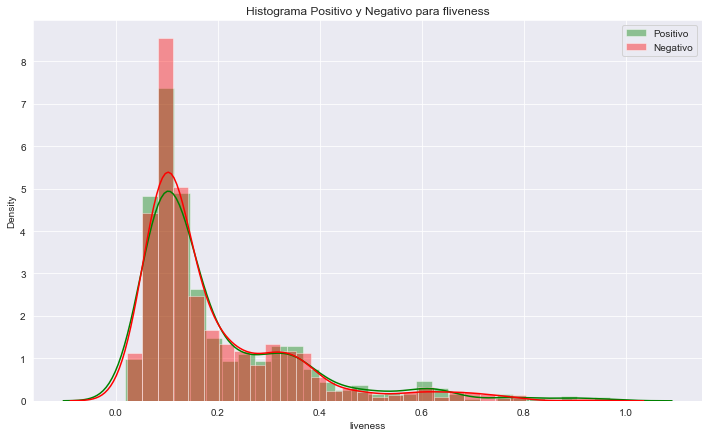

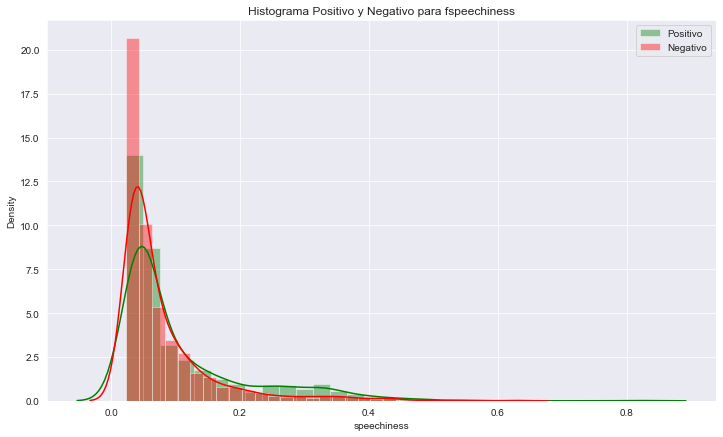

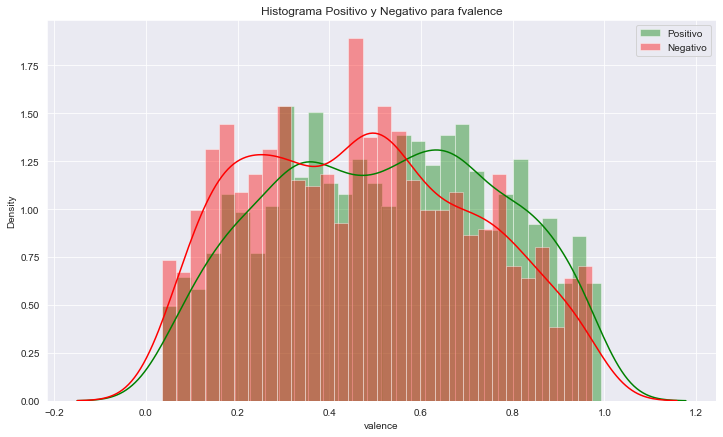

In [24]:
for caracteristicas_de_columnas in columnas_de_interes:
    pos_data = df[df["target"]==1][caracteristicas_de_columnas]
    neg_data = df[df["target"]==0][caracteristicas_de_columnas]
    
    plt.figure(figsize=(12,7))

    sns.distplot(pos_data, bins=30, label='Positivo', color='green')
    sns.distplot(neg_data, bins=30, label='Negativo', color='red')

    plt.legend(loc='upper right')
    plt.title(f"Histograma Positivo y Negativo para f{caracteristicas_de_columnas}")

### Top 5 canciones energéticas

In [25]:
top_cinco_canciones_energeticas = df[['energy', 'song_title', 'artist']].sort_values('energy', ascending=False)[:5]
top_cinco_canciones_energeticas

,energy,song_title,artist
1299,0.998,No Absolution,Thy Art Is Murder
1322,0.997,Pitchblack,Walking Dead On Broadway
1297,0.994,A Darkened Gospel,A Wake in Providence
1347,0.993,Unanswered,Suicide Silence
2015,0.992,First Contact,Twin Moons


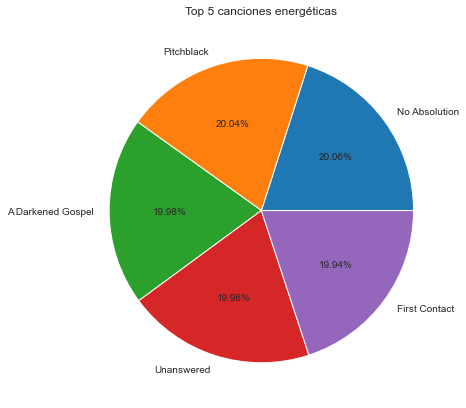

In [26]:
plt.figure(figsize=(12,7))
plt.pie(x='energy', data=top_cinco_canciones_energeticas, autopct='%1.2f%%', labels=top_cinco_canciones_energeticas.song_title)
plt.title('Top 5 canciones energéticas')
plt.show()

In [27]:
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


### Duraciones más comunes

In [35]:
duracion_mas_comun = round(df['duration_ms'].mean()/60000, 2)#Dado que el dato se encuentra en milisegundos se puede pasar a minutos para que sea más legible
print("El promedio de duración es ", duracion_mas_comun," minutos")

El promedio de duración es  4.11  minutos


### Top 5 canciones con la mayor valencia (valence)

In [37]:
top_cinco_canciones_valencia = df[['valence', 'song_title']].sort_values('valence', ascending=False)[:5]
top_cinco_canciones_valencia

,valence,song_title
460,0.992,Abataka - Original Mix
912,0.975,I'm Walkin' - 2002 Digital Remaster
1966,0.974,"To Roz Bikini (Itsy, Bitsy, Teenie, Weenie)"
207,0.973,Look at You
48,0.973,Azon de ma gnin kpevi


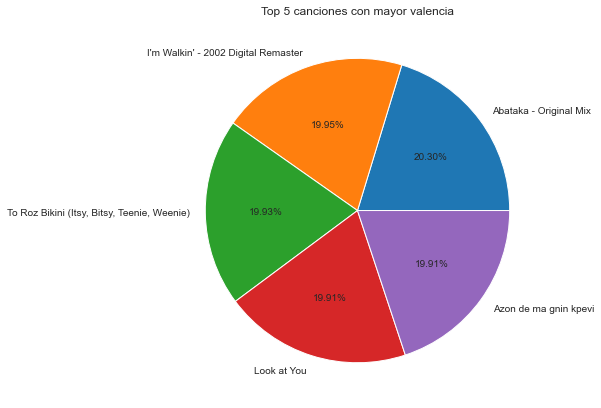

In [44]:
plt.figure(figsize=(12,7))
plt.pie(x='valence', data=top_cinco_canciones_valencia, autopct='%1.2f%%', labels=top_cinco_canciones_valencia.song_title)
plt.title('Top 5 canciones con mayor valencia')
plt.show()